 Repositorio: https://github.com/acabreraufrj/modelagem
 
 [abrir em binder](https://mybinder.org/v2/gh/acabreraufrj/modelagem/master?filepath=aulas%2FAula8.ipynb)
# Aula 8: O pendulo com angulos grandes, um pouco de EDO e simulacoes

## Objetivos

- revisitar a equacao diferencial (EDO) para o pendulo sem assumir angulos pequenos
- Obter o comportamento do periodo de oscilacao com a amplitude mediante simulacoes numericas
- Derivando analiticamente o periodo, o papel da conservacao da energia, formulas exatas

Algumas Refs:

https://en.wikipedia.org/wiki/Pendulum_(mathematics)

http://www.leapsecond.com/hsn2006/pendulum-period-agm.pdf


 # Contexto: o que estamos fazendo? 
 
 # Modelagem = 1 + 2 + 3


![](./figs/diagr_modelagem_def.jpg)

 # Contexto: o que estamos fazendo? 
 
 # Modelagem = 1 + 2 + 3


## No pendulo com angulos grandes:

- (1) considerar o angulo $\theta(t)$ formado pela corda e uma linha vertical fixa como funcao de $t$. Propomos que a aceleracao $\ddot \theta(t)$ é proporcional a $sen(\theta(t))$ (veremos a seguir por que esta proposta)

- (2) precisamos resolver a eq. diferencial (2a ordem) $\ddot \theta + c \ sen(\theta) = 0$. como caracterizar as solucoes? admite solucoes periodicas? qual é o periodo $T(\theta_0)$ como funcao das condicoes iniciais ?

- (3) comparamos nossas predicoes teoricas com dados de experimentos (já fizemos no caso $\theta \sim 0$, $sen(\theta)\sim \theta$ angulos pequenos)

## A equacao do pendulo

![](./figs/pendulo_forcas_1.png)

 - posicao $x(t) = l (sen\theta(t), - cos \theta(t) )\in \mathbb{R}^2$ 
  
  (" vinculo  cinematico "  $|x(t)|=l \forall t $, a forca $F_{vin}$ que a corda faz se adapta para que a massa fique num circulo, depende do movimento $t \mapsto x(t)$ !)
  
  
 - velocidade $\dot x (t) = l \dot \theta(t) (cos\theta(t),sen\theta(t)) $ 
 
  ($\tau(\theta):=(cos \theta,sen \theta)$ tangente  ao  circulo  em $ x(\theta) = l (sen\theta,-cos\theta) $  )
  
  
 - aceleracao  tangente  ao  circulo  $\ddot x \cdot \tau(\theta(t))  = l \ddot \theta (t)$ 
  
  
 - **Newton**: $m \ddot x (t) = m g (0,-1) \in \mathbb{R}^2 $
  
  projetando  Newton  na  componente  tangente $(\cdot \tau(\theta(t)))$
  
  $$\boxed{ l \ddot \theta = -g sen(\theta) }$$

Nossa equacao:

$$ \boxed{\ddot \theta + \frac{g}{l} sen(\theta) = 0 }\ \ (E)$$
pensaremos velocidade inicial nula $\dot \theta(0) = 0$ (sem perda de generalidade para solucoes pendulares, modulo reparametrizacao do $t$)

- quando $\theta \sim 0$ pequeno, $ sen \theta \sim \theta \Rightarrow \theta(t) = $ $ \theta_0 cos(\sqrt{\frac{g}{l}} t)$ 

- se $\theta \nsim 0$, a eq. é nao linear ($sen(x) \simeq x -x^3/3! + x^5/5! +...$), é dificil achar a solucao mediante metodos tradicionais ([proposta inicial]+[ajuste de parametros]) pela nao-linearidade


mesmo assim intuitivamente sabemos que $\theta(t)$ sera periodica. Queremos saber o periodo $T$ em funcao das variaveis externas $g,l$ e a condicao inicial $\theta_0$.



# O que esperar de $T\equiv T(\theta_0)$ ?

- sabemos para $\theta_0 \sim 0$, $T \sim 2\pi \sqrt{l/g} =: T_p$ independente de $\theta_0$

- $T(\theta_0)$ sera maior, menor... do que $T_p$ ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt


tes = np.linspace(-1.9, 1.9, 100)
fsl = tes
fss = [np.sin(x) for x in tes]

plt.title("x vs sen(x)")
plt.plot(tes,fsl)
plt.plot(tes,fss,':')

![](./figs/x_vs_sen.png)

- a forca real ($\propto sen(\theta)$) é menor em magnitude do que a forca aproximada ($\propto \theta$)
- com isto, o pendulo real vai demorar mais em voltar do que o aproximado. Esperamos entao $$ T(\theta_0) > T_p $$

- em geral se escreve $T(\theta_0,l,g) = T_p(l,g) \cdot (1 + \phi(\theta_0))$, com $\phi(\theta_0) >0$ (acontece que independe das variaveis externas $l,g$, a funcao $\phi(\theta_0)$ chama-se de "erro circular", importante para ajustar relogios!)

**Simulacoes:** 
Procedemos como se o computador fosse um 'laboratorio matematico':

- fazemos o python aproximar numericamente a solucao de $(E)$ para distintos valores de angulo inicial $\theta_0$ (sempre com $\dot \theta_0 = 0$). Esta aproximacao tem um erro comparada com a solucao exata, mas sera desprecivel para nossos fins.
- calculamos o periodo $T(\theta_0)\equiv T(\theta_0,l,g)$ destas solucoes contando o tempo entre os maximos (igual que fizemos com os dados experimentais de luminiscencia do pendulo)
- plotamos os pontos obtidos em $T$ vs $\theta_0$ e tentamos fazer uma regressao polinomial

**Obs:**

eq. 2a ordem $\ddot \theta = f(\theta)$ é equivalente a um sistema de eqs. de **1a ordem**:

$t \mapsto (\theta(t),\omega(t))$
$$ \begin{cases} \dot \theta = \omega \\ \dot \omega = f(\theta)\end{cases} $$

(é nesta forma que o python resolve via scipy.integrate)

In [2]:
# simulacao numerica da solucao
# veja eg: http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html
from scipy.integrate import odeint

l = 1
g = 9.8

def dU_dx(U, x): # a equacao diferencial de 2a ordem vista como um sistema de 2 eqs. de 1a ordem
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -(g/l)* np.sin(U[0])] # eq. pendulo ang. grandes

def dP_dx(P, x): # a equacao diferencial de 2a ordem vista como um sistema de 2 eqs. de 1a ordem
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [P[1], -(g/l)* P[0]] # eq. pendulo ang. pequenos


theta0s = np.linspace(0.0001,2,20) # angulos iniciais em rads

#colocando condicoes iniciais para os sistemas de equacoes
U0s = [ [ t0, 0] for t0 in theta0s]

#definindo intervalos e solucoes
xs = np.linspace(0, 10, 2000)
ysl = []
for i in range(len(theta0s)):
    Us = odeint(dU_dx, U0s[i], xs)
    ysl.append(Us[:,0])

ypsl = []
for i in range(len(theta0s)):
    Ps = odeint(dP_dx, U0s[i], xs)
    ypsl.append(Ps[:,0])



In [3]:
# calcular os maximos da sol. ang grande
indmaxsl = []
for k in range(len(theta0s)):
    indmaxsk=[]
    for i in range(1,len(xs)-1):
        if ysl[k][i-1]<ysl[k][i] and ysl[k][i+1]<ysl[k][i]:
            indmaxsk.append(i)
    indmaxsl.append(indmaxsk)
    
xmaxsl = [[] for k in range(len(theta0s))]
ymaxsl = [[] for k in range(len(theta0s)) ]
for k in range(len(theta0s)):
    for i in indmaxsl[k]:
        xmaxsl[k].append(xs[i])
        ymaxsl[k].append(ysl[k][i])

# calculamos os periodos
persl = [(xmaxsl[k][len(xmaxsl[k])-1] - xmaxsl[k][0])/(len(xmaxsl[k])-1)  for k in range(len(theta0s))]
print ('theta0s=', theta0s)
print('periodos=', persl )
Tp = 2*np.pi * np.sqrt(l/g)
print('periodo ang peq=', Tp)

theta0s= [1.00000000e-04 1.05357895e-01 2.10615789e-01 3.15873684e-01
 4.21131579e-01 5.26389474e-01 6.31647368e-01 7.36905263e-01
 8.42163158e-01 9.47421053e-01 1.05267895e+00 1.15793684e+00
 1.26319474e+00 1.36845263e+00 1.47371053e+00 1.57896842e+00
 1.68422632e+00 1.78948421e+00 1.89474211e+00 2.00000000e+00]
periodos= [2.0076705019176253, 2.0093380023345007, 2.012673003168251, 2.019343004835751, 2.0293480073370023, 2.0426880106720025, 2.059363014840754, 2.07770551942638, 2.099383024845756, 2.126063031515758, 2.15607803901951, 2.1894280473570116, 2.2277805569451394, 2.271135567783892, 2.317825579456395, 2.3745205936301486, 2.434550608637652, 2.5037518759379687, 2.5787893946973486, 2.668834417208605]
periodo ang peq= 2.007089923154493


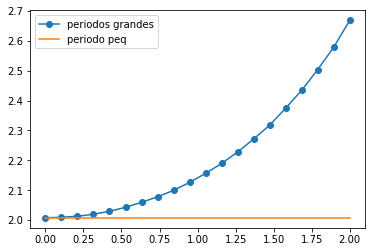

In [4]:
plt.plot(theta0s, persl, 'o-', label='periodos grandes')
plt.plot(theta0s, [Tp for t in theta0s], label='periodo peq')
plt.legend(loc='best')
plt.show()

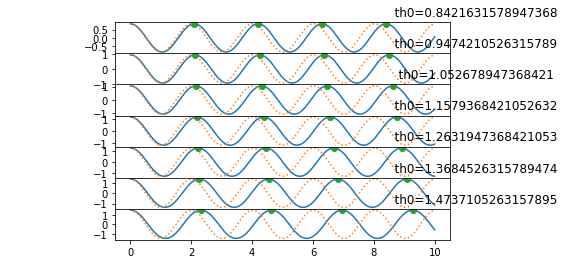

In [5]:
#graficamos as solucoes theta(t) para comparar com o coseno
from pylab import *


n = len(theta0s)


subplots_adjust(hspace=0.000)

nr = min(15,n)
rango = range(8, nr)
for iv, v in enumerate(rango):
    k = int(v)
    ax1 = subplot(len(rango),1,iv+1)
    #ax1.xlabel("t")
    #ax1.ylabel("theta(t)")
    ax1.set_title('                                                                                                    th0='+str(theta0s[k]))
    ax1.plot(xs,ysl[k])
    ax1.plot(xs,ypsl[k],':')
    ax1.plot(xmaxsl[k],ymaxsl[k],'o')

plt.show()


![](./figs/varias_sols.png)

# Fiteo de $\theta_0 \mapsto T(\theta_0)$

In [6]:
# fiteamos com um polinomio de 
n= len(theta0s)
grau = 10

print('fiteamos ', n, ' pontos com um polinomio de grau ', grau )

fit = np.polyfit(theta0s, persl, grau)

poli=''
for i in range(0,grau+1):
    poli += str(fit[grau-i])+' t^'+str(i)+' + '
poli+= '...'
print('\n p(t)=', poli)


fiteamos  20  pontos com um polinomio de grau  10

 p(t)= 2.0076606411997826 t^0 + 0.01897213869275422 t^1 + -0.07841000172676969 t^2 + 0.4795102470384338 t^3 + 0.6086254310636756 t^4 + -4.35375447037815 t^5 + 8.003010459679933 t^6 + -7.488634488095776 t^7 + 3.890249434856084 t^8 + -1.0680298242087827 t^9 + 0.12105750180982774 t^10 + ...


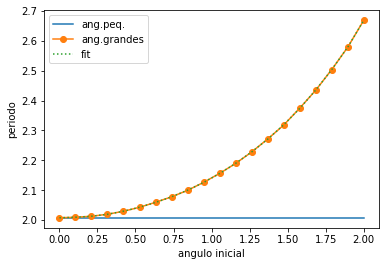

In [7]:
# graficamos T vs theta0

def polino(t):
    ret = 0
    for i in range(0,grau+1):
        ret += fit[grau-i]*t**i
    return ret

plt.plot(theta0s, [Tp for t in theta0s], label='ang.peq.')
plt.ylabel('periodo')
plt.xlabel('angulo inicial')
plt.plot(theta0s, persl, 'o-', label='ang.grandes')
plt.plot(theta0s, [polino(t) for t in theta0s], ':', label='fit')

plt.legend(loc='best')
plt.show()

![](./figs/T_vs_theta0.png)

escrevemos $T(\theta_0) = T_p \ q(\theta_0)$ para comparar mais tarde com formulas analiticas

In [8]:
print('grau=',grau)
q=''
qis = []
for i in range(0,grau+1):
    qis.append((fit[grau-i]/Tp ))
    q += str( qis[i] )+' t^'+str(i)+' + '
q+= '...'
print('\n q(t)=', q)


grau= 10

 q(t)= 1.0002843510092425 t^0 + 0.009452560383012728 t^1 + -0.0390665115808736 t^2 + 0.23890820311867222 t^3 + 0.3032377493615803 t^4 + -2.16918754867518 t^5 + 3.987370155843243 t^6 + -3.731090670978048 t^7 + 1.9382536825962817 t^8 + -0.5321285368869706 t^9 + 0.06031493677152477 t^10 + ...


**obs**: a partir de qual angulo $\theta_0$ temos $(T(\theta_0) - T_p)/T_p > 0.01$ ($1\%$ de correcao) ?

- notar: $(T(\theta_0) - T_p)/T_p = q(\theta_0) - 1$


In [64]:
# def q(t)
def polq(t):
    ret = polino(t)/Tp
    return ret
intervalo = np.linspace(0,1,1000)
tstar = 0
for t in intervalo:
    if tstar == 0 and (polq(t)-1 > 0.01):
        tstar = float(t)
print('angulo onde comenca a ter mais 1% diferenca T(t) e Tp:', tstar, 'rad = ', tstar*180/np.pi, 'grados')

angulo onde comenca a ter mais 1% diferenca T(t) e Tp: 0.40040040040040037 rad =  22.941253058291217 grados


### Moral: verificamos com aproximacoes numericas que a diferenca entre o modelo para angulos grandes e para angulos pequenos $sen \theta \sim \theta$ é significativa em 1% só a partir de $\sim 23^o$.

para $\theta_0 < 23^o$ o modelo simplificado é bom para determinar o periodo dentro de 1% de erro !

(ver https://en.wikipedia.org/wiki/Pendulum (Period of oscilation) onde esta estimativa já aparece; notar tambem que $g$ tem correcoes dependendo da latitude, que podem ser muito mais significativas para angulos pequenos)

# Metodos analiticos para calcular $T(\theta_0)$

**Conservacao da energia** ([Hamilton](https://en.wikipedia.org/wiki/William_Rowan_Hamilton),[Lagrange](https://en.wikipedia.org/wiki/Joseph-Louis_Lagrange), [Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre),... $\geq \sim 1700$)

- Consideremos a funcao $H: \mathbb{R}^2 \times \mathbb{R}^2 \to \mathbb{R}$ dada por
$$ H(x,v) = \frac{1}{2} m |v|^2 + x \cdot (0,mg) $$
- notar $V(x) = x \cdot (0,mg)$ satisface $-\nabla V(x) = - (0,mg) = F_g$ a forca de gravedade ("potencial para uma forca conservativa")

**Prop**: $\frac{d}{dt} H(x(t),\dot x (t)) = 0$ para qualquer solucao de Newton $t \mapsto x(t)$


(Exercicio! vale mais em geral $x(t)\in \mathbb{R}^n$ e $m\ddot x = F=-\nabla V$ com $m$ matriz simetrica $n\times n$ e $H(x,v) = \frac{1}{2} mx \cdot x + V(x)$)


**Conservacao da energia** (Cont)

- notar que $x\equiv x(\theta(t))$ e $v \equiv v(\theta(t),\dot \theta (t) )$, chamamos
$$ h(\theta(t), \dot \theta(t)) = H( x(\theta(t)),  v(\theta(t)) ) = \frac{1}{2}m l^2 \dot \theta(t)^ 2 -mgl \cos(\theta(t)) $$
que sera logo constante em $t$.

- observamos como $\dot \theta (0) =0$, $$ h(\theta(t), \dot \theta(t)) = -mgl cos(\theta_0), \ \forall t $$

- concluimos: $$ \dot \theta(t) = \pm \sqrt{\frac{2g}{l} (cos\theta(t) - cos \theta_0)} $$ 
(o sinal $\pm$ é ajustado sabendo se o angulo esta crescendo ou decrescendo, dependendo do momento da oscilacao)


![](./figs/fases_pend.png)

**Obs**: no plano $(\theta,\omega =  \dot \theta)$ a solucao fica nos conjuntos de nivel de energia $h(\theta,\dot \theta)=cte $

**"retrato de fases" do pendulo** 

| - | - |
|---|---|
| ![Flowers](./figs/87px-Pendulum_0deg.gif) | ![Flowers](./figs/87px-Pendulum_170deg.gif) |
|  ![Flowers](./figs/87px-Pendulum_45deg.gif) |  ![Flowers](./figs/87px-Pendulum_190deg.gif) |


# Formula integral para $T(\theta_0)$

sabemos: $$ \dot \theta(t) = \pm \sqrt{\frac{2g}{l} (cos\theta(t) - cos \theta_0)} $$

- No intervalo $t\in [0,T/4]$ em que a massa cae até a altura minima, a funcao $t \mapsto \theta(t)$ é bijetiva (invertivel) com inversa $t = \gamma(\theta), \ \theta \in [0,\theta_0]$, como o angulo esta decrescendo (se $\theta_0>0$), o sinal $\pm$ é $-1$ acima)

- pela regra da cadeia: $\frac{d \gamma}{d \theta} = (\frac{d\theta}{d t})^{-1} = 1/\dot \theta$

- pelo teo. fund. do calculo: $\gamma(\theta_0) - \gamma(0) = \int_0^{\theta_0} \frac{d \gamma}{d \theta} d\theta$

- usando que $\gamma(\theta_0) =0, \ \gamma(0)=T/4$,

$$ T = -4 \int_0^{\theta_0} \frac{-1}{ \sqrt{\frac{2g}{l} (cos\theta - cos \theta_0) } } d\theta = 4 \sqrt{\frac{l}{2g}} \int_0^{\theta_0} \frac{1}{\sqrt{cos\theta - cos\theta_0}} d\theta   $$

$$ \boxed{T(\theta_0) = 4 \sqrt{\frac{l}{2g}} \int_0^{\theta_0} \frac{1}{\sqrt{cos\theta - cos\theta_0}} d\theta} $$
- a integral que aparece é uma "integral eliptica" (completa, do 1o tipo), se conhecem expansoes em serie (eg: usando series do $cos$ e integrando termo-a-termo; em series de $sin^2$; ou mais sofisticadas usando polinomios de legendre,... [mais](http://www.leapsecond.com/hsn2006/pendulum-period-agm.pdf) )

-  ![](./figs/T_serie.svg)

$$ T(\theta_0) = T_p \ pol_{analit}(\theta_0)$$
notar: só potencias pares

- vamos comparar com os valores obtidos 'experimentalmente' 

In [40]:
# coeficientes da expansao analitica T(t) em potencias pares de t
cis =[0 for i in range(200)]
# desde wiki pendulo (math), https://oeis.org/A223068/list
denoms = [1,16,3072,737280,1321205760,951268147200, 2009078326886400,265928913086054400, 44931349155019751424000,
 109991942731488351485952000, 668751011807449177034588160000, 2471703739640332158319837839360000]
#https://oeis.org/A223067/list
numers = [1,1,11,173,22931,1319183,233526463,2673857519,39959591850371,8797116290975003,4872532317019728133,1657631603843299234219,
 247098748783812523360613, 77729277912104164732573547,1503342018433974345747514544039]
for i in range(len(denoms)):
    cis[2*i]= numers[i]/denoms[i]
    

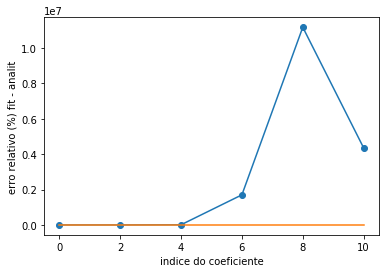

muito erro nos coeficientes!


In [67]:
# graficamos erro nos coeficientes do fit comparados com os teoricos   
indicespares = [i for i in range(len(qis)) if i % 2 == 0]

plt.plot(indicespares, [100*np.abs(qis[i]-cis[i])/np.abs(cis[i]) for i in indicespares], 'o-')
plt.plot(range(len(qis)), [0 for i in range(len(qis))])
plt.xlabel('indice do coeficiente')
plt.ylabel('erro relativo (%) fit - analit')
plt.show()

print('muito erro nos coeficientes!')

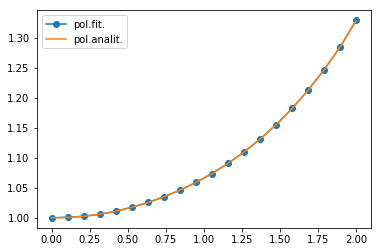

erro rel. medio (%)= 0.01919328427446689 (pouco erro nos valores!)


In [58]:
def polana(t): #def polinomio analitico
    ret=0
    for i in range(len(cis)):
        ret += cis[i]*t**i
    return ret

plt.plot(theta0s, [polino(t)/Tp for t in theta0s],'o-', label='pol.fit.')
plt.plot(theta0s, [polana(t) for t in theta0s], label='pol.analit.')
plt.legend(loc='best')
plt.show()

print('erro rel. medio (%)=',  np.sum([100*np.abs(polana(t)- (polino(t)/Tp) )/np.abs(polana(t)) for t in theta0s])/len(theta0s) , '(pouco erro nos valores!)' )

- Como aconteceu no pendulo, ajusta "bem" os pontos mas os coeficientes da regressao nao coincidem muito bem com os analiticos porque o polinomio analitico só tem potencias pares entanto o fit foi feito admitindo todas as potencias.

- Refazemos entao o fit só incluindo potencias pares (até mesmo grau do fit inicial, notar menos parametros a ajustar!)

In [59]:
llinhas = [[] for t in theta0s]
for it,t in enumerate(theta0s):
    for g in range(grau+1):
        if g % 2 == 0: # n % p 'e n mod p
            llinhas[it].append(t**(grau - g)) 

mat = np.vstack(llinhas)
fit2 = np.linalg.lstsq(mat, persl, rcond=None)

npis = list( reversed(fit2[0])) # revertimos a ordem porque fit2 tem o coef da potencia maxima primeiro

nqis = [npis[i]/Tp for i in range(len(npis))]

for i in range(len(nqis)):
    print('coef fit2 t^'+str(2*i)+'=', nqis[i], ' vs ', cis[2*i], ':= coef.anal.')


coef fit2 t^0= 1.00009426846349  vs  1.0 := coef.anal.
coef fit2 t^2= 0.06340258994158374  vs  0.0625 := coef.anal.
coef fit2 t^4= 0.0011637076097810234  vs  0.0035807291666666665 := coef.anal.
coef fit2 t^6= 0.002190542360460602  vs  0.00023464626736111112 := coef.anal.
coef fit2 t^8= -0.0006084590902434103  vs  1.735611567421565e-05 := coef.anal.
coef fit2 t^10= 7.10924787012766e-05  vs  1.3867625063268805e-06 := coef.anal.


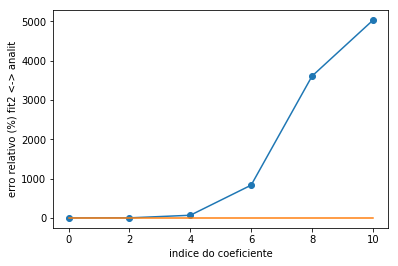

bem melhor!


In [69]:
rango = [2*i for i in range(len(nqis))]
plt.plot(rango, [100*np.abs(nqis[i]-cis[2*i])/np.abs(cis[2*i]) for i in range(len(nqis))], 'o-')
plt.plot(rango, [0 for i in rango])
plt.xlabel('indice do coeficiente')
plt.ylabel('erro relativo (%) fit2 <-> analit')
plt.show()

print('bem melhor!')

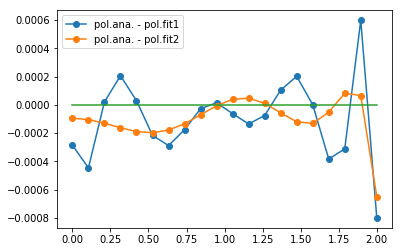

In [62]:
# comparamos fit1 vs fit2 vs analit em termos de valores do periodo
def polf2(t): #polinomio da regressao s'o com potencias pares
    ret=0
    for i in range(len(nqis)):
        ret+= nqis[i]*t**(2*i)
    return ret 

plt.plot(theta0s, [polana(t) - polino(t)/Tp for t in theta0s],'o-', label='pol.ana. - pol.fit1')
#plt.plot(theta0s, [polana(t) for t in theta0s], label='pol.analit.')
plt.plot(theta0s, [polana(t) - polf2(t) for t in theta0s],'o-', label='pol.ana. - pol.fit2')
plt.plot(theta0s, [0 for t in theta0s])

plt.legend(loc='best')
plt.show()



## melhorou !

# Formula exata simples para $T(\theta_0)$ [2008!]

- é extranho que um problema tao simples, basico e tao estudado como um "pendulo simples" tenha uma resposta $\theta_0 \mapsto T(\theta_0)$ tao complexa e pouco elementar 

- com expansoes em serie para $T(\theta_0)$ é dificil saber quantos termos usar para obter uma dada precissao, se sabe que a convergencia da serie é lenta

- Em 2008, Claudio G. Carvalhaes, Patrick Suppes (matematicos, [paper](https://suppes-corpus.stanford.edu/articles/physics/431.pdf) ) acharam uma formula extremadamente simples e elementar:
$$ T(\theta_0) = T_p /AGM(1,cos(\theta_0/2))$$
onde $AGM(a,b)$ é a funcao "Aritmetric-Geometric mean" ([Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) $\sim 1800$) 


**Funcao AGM**: $(a,b) \mapsto AGM(a,b) \in \mathbb{R}$

se define por um algoritmo simples: 

- consideramos a operacao $M: (a,b) \mapsto ((a+b)/2 , \sqrt{ab})$ (media aritmetica, media geometrica),

- aplicamos $M$ iterativamente

- se pode provar que $M^n(a,b) = (y,y)$ para algum $n$ finito (ainda mais: a convergencia é quadratica, muito rapida, se duplica o numero de digitos corretos em cada passo!)

- o valor $y=:AGM(a,b)$

**Obs**: na pratica, podemos para as iteracoes quando $M^n(a,b) = (y_1,y_2), \ y_1 \sim y_2$ com grau de precisao "aceitavel" (eg: 10 casas decimais)

In [27]:
# definindo a funcao AGM com um algoritmo simples
def medias(a,b): #cuidar de colocar numeros positivos a,b
    y1 = (a+b)/2
    y2 = np.sqrt(a*b)
    return y1,y2
def agm(a,b): #cuidar de colocar numeros positivos a,b
    y1,y2 = a,b
    itera = 0
    while np.abs(y1-y2) > 10**(-10):
        y1,y2 = medias(y1,y2)
        itera += 1
    return y1, itera

print(agm(1,2))
print(agm(12.345, 98.765))
print(agm(1,np.cos(0.001)))

    

(1.4567910310469068, 4)
(44.63812979234222, 5)
(0.9999997500000208, 1)


### calculemos  os periodos $T(\theta_0)$ com a formula AGM e comparemos com os periodos obtidos mediante aprox. numerica a solucao da eq. do pendulo


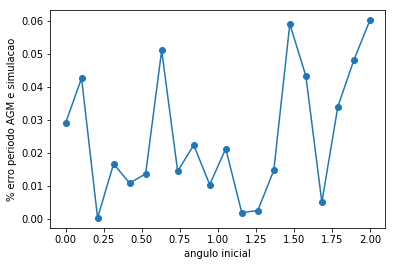

In [39]:
def funcT(t):
    ret = Tp/agm(1,np.cos(t/2))[0]
    return ret
persagm = [funcT(t) for t in theta0s]

print('')

plt.plot(theta0s, [100*np.abs(persagm[i] - persl[i])/np.abs(persagm[i]) for i in range(len(theta0s))],'o-')
plt.ylabel('% erro periodo AGM e simulacao')
plt.xlabel('angulo inicial')
plt.show()

# Conclussao: a formula AGM e a simulacao numerica coincidem em $0,06 \%$ de erro !

# exercicios:

- variar os parametros (numero de maximos para calcular periodos, numero de angulos iniciais, grau dos fits, etc) e ver se se conseguem melhores aproximacoes para os coeficientes na expansao de $T(\theta_0)$

- notar que alguns valores da funcao matematica $AGM$ podem ser calculados (ou 'medidos experimentalmente') usando um pendulo ! verificar analiticamente e computacionalmente que $AGM(\lambda a, \lambda b) = \lambda AGM(a,b), \lambda > 0$, o qual permite extender a todos $a,b > 0$.

- calcular a energia $h(\theta(t),\dot \theta(t))$ ao longo da solucao numerica $\theta(t)$, verificar que é constante.  Plotar $t \mapsto (\theta(t),\dot \theta(t))$ e verificar o diagrama de fases para o pendulo

- verificar mediante simulacoes que $\theta_0 = 180^o$ é um equilibrio instavel (analiticamente, a solucao é constante $\theta(t)=\theta_0$, mas qualquer perturbacao $\theta_0 + \delta$ faz com que a solucao se afaste significativamente). Repeter com $\theta_0 = 0$ verificando que é estavel (a solucao fica perto da constante)